In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

from epitools import get_data

In [2]:
year = 2022

df_dv = get_data(
    country="France",
    year=year,
    election="first_round",
    aggregation="department_id",
    method="nv"
)
df_dv.head()

,department_id,epi,epi_between,epi_within,year
0,01,0.899334,0.867431,0.031903,2022
1,02,0.877552,0.844325,0.033227,2022
2,03,0.903462,0.871383,0.032079,2022
3,04,0.901569,0.870461,0.031109,2022
4,05,0.906952,0.876235,0.030717,2022


In [3]:
df_dv.sort_values("epi")
# Lozère (EPI=0.92), Pyrénées-Atlantiques (EPI=0.92), and Corrèze (EPI=0.91)


,department_id,epi,epi_between,epi_within,year
96,ZA,0.841997,0.813278,0.028719,2022
104,ZW,0.847175,0.847175,0.000000,2022
98,ZC,0.854218,0.823900,0.030318,2022
97,ZB,0.855226,0.817251,0.037975,2022
103,ZS,0.861667,0.849852,0.011815,2022
...,...,...,...,...,...
64,64,0.915472,0.879318,0.036154,2022
18,19,0.919991,0.888521,0.031470,2022
48,48,0.920055,0.878697,0.041358,2022
28,2A,0.921493,0.876791,0.044702,2022


In [4]:
year_insee = 20

df_insee = pd.read_excel(
    f"../data_external/France/Insee/20{year_insee}/FILO20{year_insee}_DEC_DEP.xlsx",
    sheet_name="ENSEMBLE", 
    header=5
)
df_insee = df_insee.rename(columns={
    "CODGEO": "department_id", 
    f"Q2{year_insee}": "median_income",
    f"GI{year_insee}": "gini"
})
df_insee["gini"] = df_insee["gini"].str.replace(",", ".").astype(float) #.str.replace(",", ".")
df_insee.head()

,department_id,LIBGEO,NBMEN20,NBPERS20,NBUC20,PMIMP20,Q120,median_income,Q320,Q3_Q1,...,D920,RD,S80S2020,gini,PACT20,PTSA20,PCHO20,PBEN20,PPEN20,PAUT20
0,01,Ain,270582,639026,"431496,2","52,8",16400,23650,33300,16900,...,48940,"5,1","7,0",0.358,"71,7","65,4","3,0","3,3","23,6","4,7"
1,02,Aisne,225295,513727,"352126,4","42,2",12310,19310,26540,14220,...,35580,"6,2","8,3",0.351,"64,5","56,0","3,3","5,2","30,7","4,8"
2,03,Allier,159484,324725,"233238,6","42,6",13640,19990,27000,13360,...,35950,"5,3","7,0",0.329,"57,8","49,8","2,8","5,2","37,7","4,5"
3,04,Alpes-de-Haute-Provence,73774,150979,"108157,7","44,8",13560,20430,28600,15040,...,38610,"5,3","7,1",0.340,"56,2","46,9","3,4","5,9","36,3","7,5"
4,05,Hautes-Alpes,64892,133112,"95225,1","46,8",14520,20760,28270,13750,...,38120,"4,4","5,9",0.318,"58,2","48,1","3,5","6,6","35,0","6,8"


In [5]:
df_rurality = pd.read_excel(
    "https://www.insee.fr/fr/statistiques/fichier/4806684/if210.xlsx",
    sheet_name="Figure 2"
).dropna()
# https://www.insee.fr/fr/statistiques/4806684
df_rurality = df_rurality.rename(columns={
    "Figure 2 - Part de la population française en 2017 vivant dans une unité urbaine": "department_id",
    "Unnamed: 1": "department",
    "Unnamed: 2": "urban"
})
df_rurality["rurality"] = 1 - df_rurality["urban"]/100
df_rurality["rurality"] = df_rurality["rurality"].astype(float)
df_rurality.head()

,department_id,department,urban,rurality
1,01,Ain,67,0.330
2,02,Aisne,53.2,0.468
3,03,Allier,58.3,0.417
4,04,Alpes-de-Haute-Provence,61.9,0.381
5,05,Hautes-Alpes,59.5,0.405


In [6]:
df_poverty = pd.read_excel(
    "https://www.insee.fr/fr/statistiques/fichier/5371235/RPM2021-F18.xlsx",
    sheet_name="figure 2",
    header=2
).head(101)
df_poverty = df_poverty.rename(columns={"Code": "department_id", "Taux de pauvreté (en\xa0%)": "poverty_rate"})
df_poverty.head()

,department_id,Département,poverty_rate
0,01,Ain,10.3
1,02,Aisne,18.4
2,03,Allier,15.5
3,04,Alpes-de-Haute-Provence,16.8
4,05,Hautes-Alpes,13.9


In [7]:
data = pd.merge(df_insee[["department_id", "gini", "median_income"]], df_dv, on="department_id")
data = pd.merge(data, df_rurality, on="department_id")
data = pd.merge(data, df_poverty, on="department_id")
data = data[["epi", "epi_between", "epi_within", "gini", "median_income", "rurality", "poverty_rate"]]
data.head()

,epi,epi_between,epi_within,gini,median_income,rurality,poverty_rate
0,0.899334,0.867431,0.031903,0.358,23650,0.330,10.3
1,0.877552,0.844325,0.033227,0.351,19310,0.468,18.4
2,0.903462,0.871383,0.032079,0.329,19990,0.417,15.5
3,0.901569,0.870461,0.031109,0.340,20430,0.381,16.8
4,0.906952,0.876235,0.030717,0.318,20760,0.405,13.9


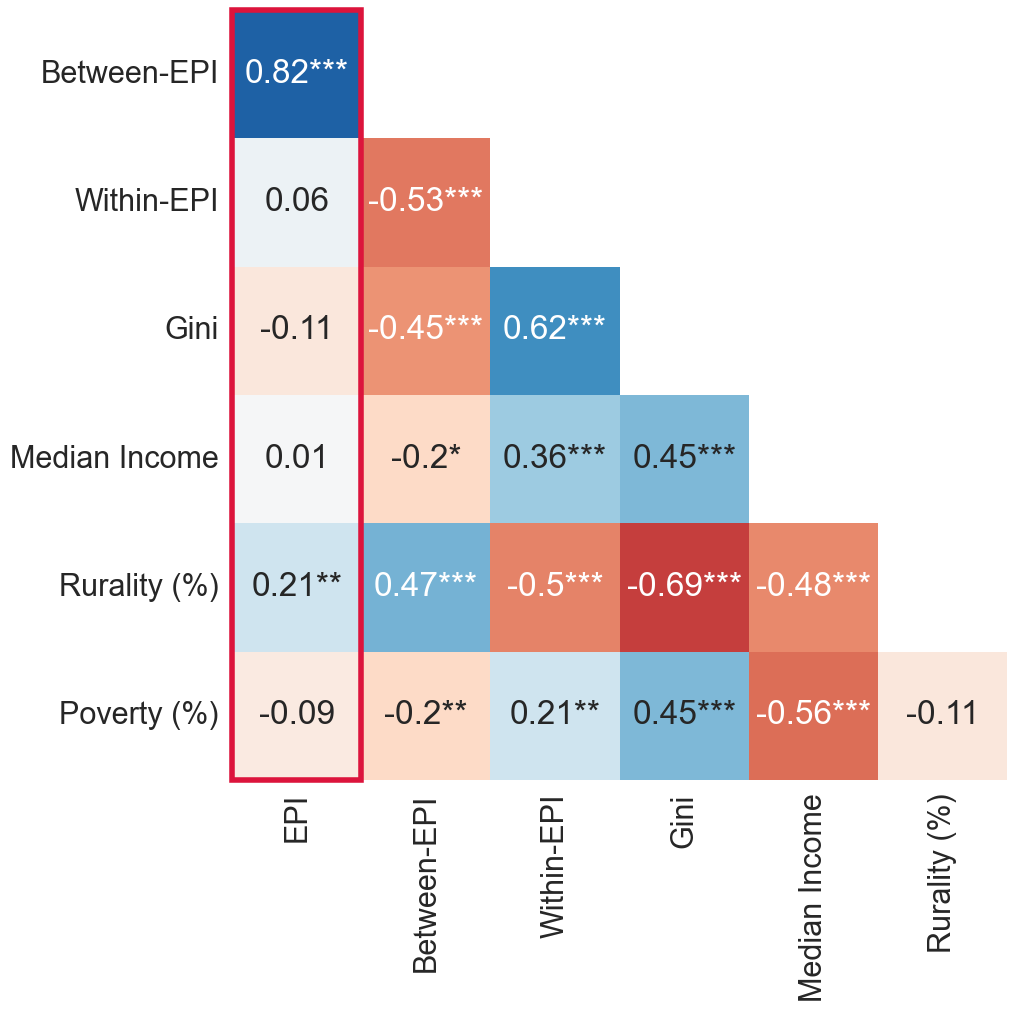

In [8]:
def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"{corr}***"
    elif _ < 0.05:
        return f"{corr}**"
    elif _ < 0.1:
        return f"{corr}*"
    return corr

sns.set_style("whitegrid")
sns.set(font_scale=2, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rcParams['axes.grid'] = True

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

dd = data.copy() #, "household_income"
dd = dd.rename(columns={
    "epi": "EPI",
    "epi_between": "Between-EPI",
    "epi_within": "Within-EPI",
    "poverty_rate": "Poverty (%)",
    "gini": "Gini",
    "median_income": "Median Income",
    "rurality": "Rurality (%)"
})
# dd["Rurality (%)"] = dd["Rurality (%)"].astype(float)

corr_m = dd.corr()
rho = dd.corr()
pval = dd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")
# print(p)
labels_m = list(corr_m)
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")
#  
g = sns.heatmap(heatmap_data, annot=p, vmin=-1, vmax=1, ax=ax, cmap="RdBu", fmt="", cbar=False)

g.set_ylim(heatmap_data.shape[0], 0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

from matplotlib.patches import Rectangle

wanted_label = 'Divisiveness'
wanted_index = 0 #labels.index(wanted_label)
N = len(list(heatmap_data))
x, y, w, h = 0, wanted_index, N, 1
for _ in range(1):
    g.add_patch(Rectangle((x, y), h, w, fill=False, edgecolor='crimson', lw=4, clip_on=False))

In [10]:
dd.to_csv("France.csv", index=False)